# Heart Stroke Prediction using ML

------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

--------------------

In [2]:
df=pd.read_csv("heart_patient_data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df.shape

(5110, 12)

There are 5110 rows and 12 columns in the dataset.

--------

In [4]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [6]:
df = df.drop(["id"],axis="columns")
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [7]:
X = df.iloc[:,:-1] #feature
Y = df.iloc[:,10].values #classlabel
Y = df[['stroke']]
Y

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
5105,0
5106,0
5107,0
5108,0


In [8]:
# converting object data to integer
labelencoder_X=LabelEncoder()
X = X.apply(LabelEncoder().fit_transform)
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,88,0,1,1,2,1,3850,240,1
1,0,82,0,0,1,3,0,3588,162,2
2,1,101,0,1,1,2,0,2483,199,2
3,0,70,0,0,1,2,1,3385,218,3
4,0,100,1,0,1,3,0,3394,113,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,101,1,0,1,2,1,1360,162,2
5106,0,102,0,0,1,3,1,3030,274,2
5107,0,56,0,0,1,3,0,1314,180,2
5108,1,72,0,0,1,2,0,3363,129,1


In [9]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state = 42)
len(x_train),len(x_test),len(y_train),len(y_test)

(3832, 1278, 3832, 1278)

--------

# 1) Machine Learning Algorithms

### 1. Naive Bayes Classification

In [10]:
naive=GaussianNB()
naive_model=naive.fit(x_train,y_train)
naive_model
print('The model has ran Successfully!!')

The model has ran Successfully!!


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
y_test['Predicted_NBC'] = naive_model.predict(x_test)
y_test

,stroke,Predicted_NBC
4688,0,0
4478,0,0
3849,0,0
4355,0,1
3826,0,0
...,...,...
1533,0,0
2437,0,0
3164,0,0
92,1,0


In [12]:
print(confusion_matrix(y_test['stroke'],y_test['Predicted_NBC']))

[[1083  115]
 [  51   29]]


In [13]:
accuracy_nbc= accuracy_score(y_test['stroke'],y_test['Predicted_NBC'])
print('Accuracy of Naive Bayes Calssification model is: {:.2f} %'.format(accuracy_nbc * 100))


Accuracy of Naive Bayes Calssification model is: 87.01 %


-----------

### 2. Decision Tree Classification

In [14]:
regressor = DecisionTreeClassifier(criterion = 'gini',max_depth=5,splitter='best')
regressor.fit(X,Y)

DecisionTreeClassifier(max_depth=5)

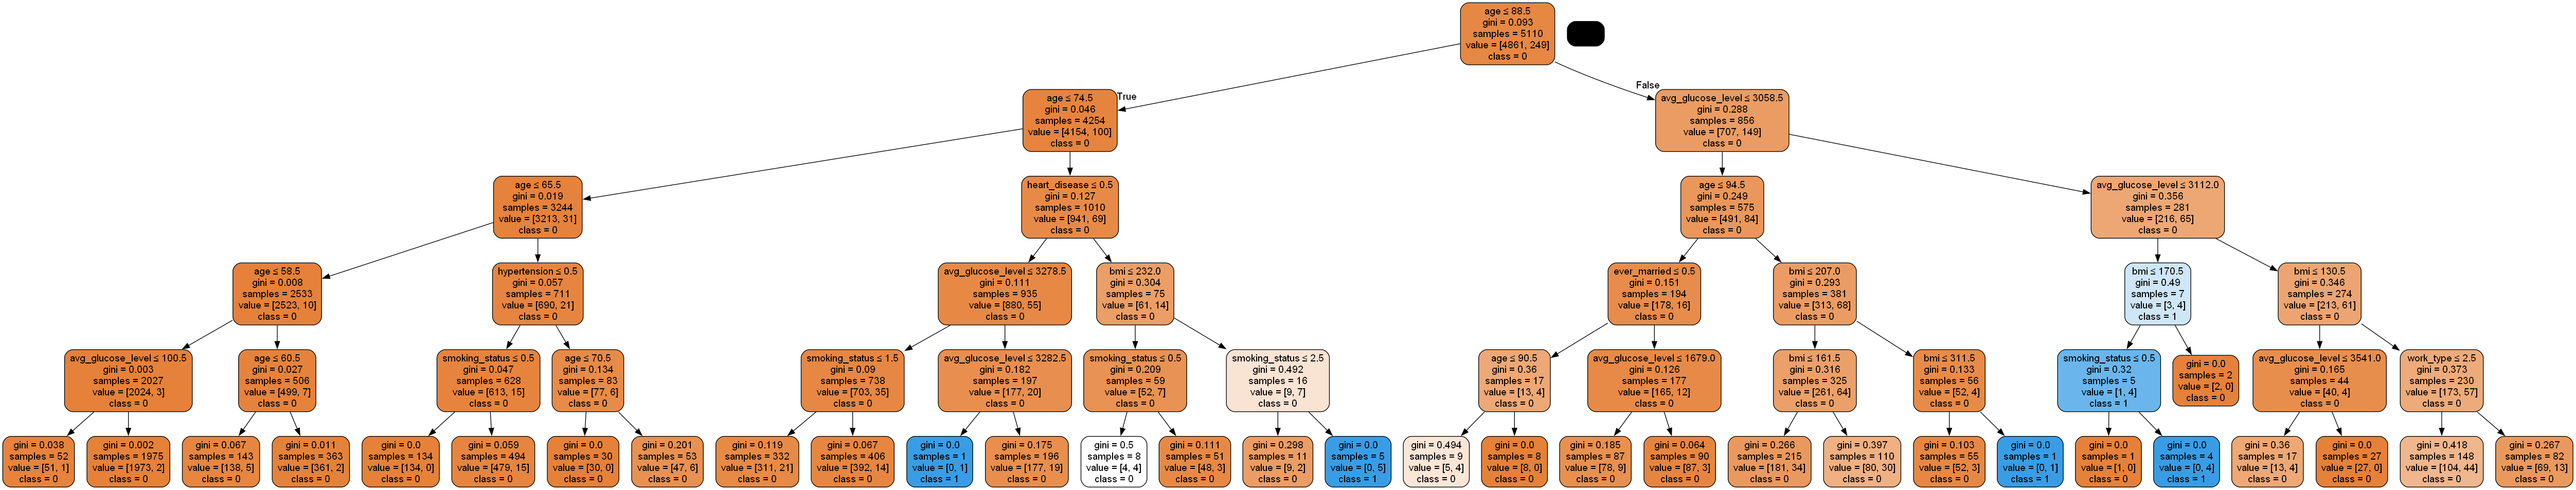

In [15]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

feature_cols = ['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']
export_graphviz(regressor,out_file = dot_data, filled = True, rounded = True, special_characters = True, feature_names = feature_cols, class_names = ['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [16]:
y_test['Predicted_DTC'] = regressor.predict(x_test)
y_test

,stroke,Predicted_NBC,Predicted_DTC
4688,0,0,0
4478,0,0,0
3849,0,0,0
4355,0,1,0
3826,0,0,0
...,...,...,...
1533,0,0,0
2437,0,0,0
3164,0,0,0
92,1,0,0


In [17]:
print(confusion_matrix(y_test['stroke'],y_test['Predicted_DTC']))

[[1198    0]
 [  78    2]]


In [18]:
accuracy_dtc = accuracy_score(y_test['stroke'],y_test['Predicted_DTC'])
print('Accuracy of Decision Tree Classifier model is: {:.2f} %'.format(accuracy_dtc * 100))

Accuracy of Decision Tree Classifier model is: 93.90 %


------

### 3. Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf.fit(x_train, y_train)

# Make predictions on the test set
y_test['rf_predict'] = rf.predict(x_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test['stroke'], y_test['rf_predict'])
print('Accuracy of Random Forest Model: {:.2f} %'.format(accuracy_rf * 100))

C:\Users\HARISH GOWDA\AppData\Local\Temp\ipykernel_7900\3460160635.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


Accuracy of Random Forest Model: 93.66 %


--------

### 3. Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
lr = LogisticRegression(random_state=42)

# Train the Logistic Regression model
lr.fit(x_train, y_train)

# Make predictions on the test set
y_test['lr_predict'] = lr.predict(x_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test['stroke'], y_test['lr_predict'])
print(' Accuracy of Logistic Regression Model: {:.2f} %'.format(accuracy_lr * 100))

 Accuracy of Logistic Regression Model: 93.58 %


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--------

### 4. Support Vector Machine

In [21]:
from sklearn.svm import SVC

# Create an SVM classifier
svm_classifier = SVC(random_state=42)

# Train the SVM model
svm_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_test['svm_predict'] = svm_classifier.predict(x_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test['stroke'], y_test['svm_predict'])
print('Accuracy of SVM Model: {:.2f} %'.format(accuracy_svm * 100))

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of SVM Model: 93.74 %


-------

# 2) Deep Learning Algorithms

### 5. Artificial Neural Network (ANN) with Embedding Layers

In [22]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from tensorflow.keras.optimizers import Adam

# Separate features and target variable
X = df.drop(columns=['stroke'])  # Features
y = df['stroke']  # Target variable

# Handle missing values in 'bmi'
X['bmi'].fillna(X['bmi'].mean(), inplace=True)

# Define categorical and numeric features
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
numeric_features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

# Encode categorical features only
labelencoder_X = LabelEncoder()
for feature in categorical_features:
    X[feature] = labelencoder_X.fit_transform(X[feature])

# Split data into numeric and categorical features
X_numeric = X[numeric_features].values
X_categorical = X[categorical_features].values

# Train-test split
X_numeric_train, X_numeric_test, X_categorical_train, X_categorical_test, y_train, y_test = train_test_split(
    X_numeric, X_categorical, y.values, test_size=0.2, random_state=42
)

# Input layers for numeric and categorical features
num_numeric_features = X_numeric_train.shape[1]
numeric_input = Input(shape=(num_numeric_features,))

cat_inputs = []
embedding_layers = []

for i, cat_feature in enumerate(categorical_features):
    # Determine the number of unique categories dynamically
    num_categories = df[cat_feature].nunique()
    embedding_dim = min(50, int(np.ceil(np.sqrt(num_categories))))  # Dynamic embedding dimension

    # Create input and embedding layers
    cat_input = Input(shape=(1,), name=f'{cat_feature}_input')
    cat_inputs.append(cat_input)

    embedding_layer = Embedding(input_dim=num_categories, output_dim=embedding_dim, name=f'{cat_feature}_embedding')(cat_input)
    flatten_layer = Flatten(name=f'{cat_feature}_flatten')(embedding_layer)
    embedding_layers.append(flatten_layer)

# Concatenate all embeddings
concatenated_embeddings = Concatenate()(embedding_layers)

# Combine numeric and categorical features
concatenated_input = Concatenate()([numeric_input, concatenated_embeddings])

# Neural network layers
hidden_layer1 = Dense(64, activation='relu')(concatenated_input)
hidden_layer2 = Dense(32, activation='relu')(hidden_layer1)
output_layer = Dense(1, activation='sigmoid')(hidden_layer2)

# Define and compile the model
model = Model(inputs=[numeric_input] + cat_inputs, outputs=output_layer)
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    [X_numeric_train] + [X_categorical_train[:, i] for i in range(X_categorical_train.shape[1])],
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(
    [X_numeric_test] + [X_categorical_test[:, i] for i in range(X_categorical_test.shape[1])],
    y_test
)
print('Test Accuracy: ', test_accuracy * 100)


Epoch 1/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9346 - loss: 0.3034 - val_accuracy: 0.9548 - val_loss: 0.2485
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9603 - loss: 0.1903 - val_accuracy: 0.9548 - val_loss: 0.1771
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9461 - loss: 0.2101 - val_accuracy: 0.9450 - val_loss: 0.1828
Epoch 4/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9525 - loss: 0.1868 - val_accuracy: 0.9548 - val_loss: 0.1736
Epoch 5/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9548 - loss: 0.1668 - val_accuracy: 0.9535 - val_loss: 0.1725
Epoch 6/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9452 - loss: 0.1936 - val_accuracy: 0.9548 - val_loss: 0.1839
Epoch 7/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9518 - loss: 0.1713 - val_accuracy: 0.9548 - val_loss: 0.2073
Epoch 8/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9551 - loss: 0.1798 - val_accu

In [23]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ gender_input (InputLayer)     │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ ever_married_input            │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ work_type_input (InputLayer)  │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Residence_type_input          │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ smoking_status_input          │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gender_embedding (Embedding)  │ (None, 1, 2)              │               6 │ gender_input[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ ever_married_embedding        │ (None, 1, 2)              │               4 │ ever_married_input[0][0]   │
│ (Embedding)                   │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ work_type_embedding           │ (None, 1, 3)              │              15 │ work_type_input[0][0]      │
│ (Embedding)                   │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Residence_type_embedding      │ (None, 1, 2)              │               4 │ Residence_type_input[0][0] │
│ (Embedding)                   │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ smoking_status_embedding      │ (None, 1, 2)              │               8 │ smoking_status_input[0][0] │
│ (Embedding)                   │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gender_flatten (Flatten)      │ (None, 2)                 │               0 │ gender_embedding[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ ever_married_flatten          │ (None, 2)                 │               0 │ ever_married_embedding[0]… │
│ (Flatten)                     │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ work_type_flatten (Flatten)   │ (None, 3)                 │               0 │ work_type_embedding[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 9,716 (37.96 KB)

 Trainable params: 3,238 (12.65 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,478 (25.31 KB)

--------

# Results

#### Comparing Accuracies of all algorithms

In [24]:
accuracies = [accuracy_nbc,accuracy_dtc,accuracy_rf,accuracy_lr,accuracy_svm,test_accuracy]
print(accuracies)

[0.8701095461658842, 0.9389671361502347, 0.9366197183098591, 0.9358372456964006, 0.9374021909233177, 0.9393346309661865]


--------

# Data Visualization

#### Bar Graph

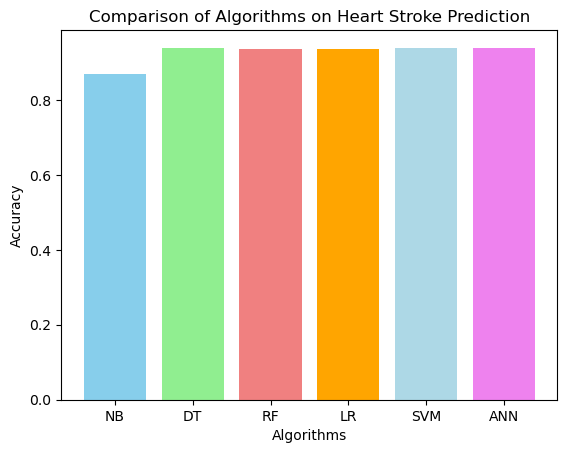

In [25]:
import matplotlib.pyplot as plt
import numpy as np

algorithms = ['NB', 'DT', 'RF', 'LR', 'SVM','ANN']

colors = ['skyblue', 'lightgreen', 'lightcoral', 'orange', 'lightblue', 'violet']


plt.bar(algorithms, accuracies, color = colors)

plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Comparison of Algorithms on Heart Stroke Prediction')

plt.show()